## Suprise Housing Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
houses = pd.read_csv("train.csv")

In [3]:
# print the fist 5 Data points from dataset
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# summary of the dataset: 81 columns, no null values
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [5]:
#MSSubClass: Identifies the type of dwelling involved in the sale.	
#
#        20	1-STORY 1946 & NEWER ALL STYLES
#        30	1-STORY 1945 & OLDER
#        40	1-STORY W/FINISHED ATTIC ALL AGES
#        45	1-1/2 STORY - UNFINISHED ALL AGES
#        50	1-1/2 STORY FINISHED ALL AGES
#        60	2-STORY 1946 & NEWER
#        70	2-STORY 1945 & OLDER
#        75	2-1/2 STORY ALL AGES
#        80	SPLIT OR MULTI-LEVEL
#        85	SPLIT FOYER
#        90	DUPLEX - ALL STYLES AND AGES
#       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
#       150	1-1/2 STORY PUD - ALL AGES
#       160	2-STORY PUD - 1946 & NEWER
#       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
#       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

houses['MSSubClass'].astype('category').value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [6]:
#MSZoning: Identifies the general zoning classification of the sale.
#
#       A	Agriculture
#       C	Commercial
#       FV	Floating Village Residential
#       I	Industrial
#       RH	Residential High Density
#       RL	Residential Low Density
#       RP	Residential Low Density Park 
#       RM	Residential Medium Density

houses['MSZoning'].astype('category').value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [7]:
#Street: Type of road access to property
#
#       Grvl	Gravel	
#       Pave	Paved
houses['Street'].astype('category').value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [8]:
#Alley: Type of alley access to property
#
#       Grvl	Gravel
#       Pave	Paved
#       NA 	No alley access

houses['Alley'].astype('category').value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [9]:
#LotShape: General shape of property
#
#       Reg	Regular	
#       IR1	Slightly irregular
#       IR2	Moderately Irregular
#       IR3	Irregular
    
houses['LotShape'].astype('category').value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [10]:
#LandContour: Flatness of the property
#
#       Lvl	Near Flat/Level	
#       Bnk	Banked - Quick and significant rise from street grade to building
#       HLS	Hillside - Significant slope from side to side
#       Low	Depression

houses['LandContour'].astype('category').value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [11]:
#Utilities: Type of utilities available
#
#       AllPub	All public Utilities (E,G,W,& S)	
#       NoSewr	Electricity, Gas, and Water (Septic Tank)
#       NoSeWa	Electricity and Gas Only
#       ELO	Electricity only

houses['Utilities'].astype('category').value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [12]:
#LotConfig: Lot configuration
#
#       Inside	Inside lot
#       Corner	Corner lot
#       CulDSac	Cul-de-sac
#       FR2	Frontage on 2 sides of property
#       FR3	Frontage on 3 sides of property

houses['LotConfig'].astype('category').value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [13]:
#LandSlope: Slope of property
#
#       Gtl	Gentle slope
#       Mod	Moderate Slope	
#       Sev	Severe Slope

houses['LandSlope'].astype('category').value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [14]:
#Neighborhood: Physical locations within Ames city limits
#
#       Blmngtn	Bloomington Heights
#       Blueste	Bluestem
#       BrDale	Briardale
#       BrkSide	Brookside
#       ClearCr	Clear Creek
#       CollgCr	College Creek
#       Crawfor	Crawford
#       Edwards	Edwards
#       Gilbert	Gilbert
#       IDOTRR	Iowa DOT and Rail Road
#       MeadowV	Meadow Village
#       Mitchel	Mitchell
#       Names	North Ames
#       NoRidge	Northridge
#       NPkVill	Northpark Villa
#       NridgHt	Northridge Heights
#       NWAmes	Northwest Ames
#       OldTown	Old Town
#       SWISU	South & West of Iowa State University
#       Sawyer	Sawyer
#       SawyerW	Sawyer West
#       Somerst	Somerset
#       StoneBr	Stone Brook
#       Timber	Timberland
#       Veenker	Veenker

houses['Neighborhood'].astype('category').value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [15]:
#Condition1: Proximity to various conditions
#
#       Artery	Adjacent to arterial street
#       Feedr	Adjacent to feeder street	
#       Norm	Normal	
#       RRNn	Within 200' of North-South Railroad
#       RRAn	Adjacent to North-South Railroad
#       PosN	Near positive off-site feature--park, greenbelt, etc.
#       PosA	Adjacent to postive off-site feature
#       RRNe	Within 200' of East-West Railroad
#       RRAe	Adjacent to East-West Railroad

houses['Condition1'].astype('category').value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [16]:
#Condition2: Proximity to various conditions (if more than one is present)
#
#       Artery	Adjacent to arterial street
#       Feedr	Adjacent to feeder street	
#       Norm	Normal	
#       RRNn	Within 200' of North-South Railroad
#       RRAn	Adjacent to North-South Railroad
#       PosN	Near positive off-site feature--park, greenbelt, etc.
#       PosA	Adjacent to postive off-site feature
#       RRNe	Within 200' of East-West Railroad
#       RRAe	Adjacent to East-West Railroad

houses['Condition2'].astype('category').value_counts()

Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

In [17]:
#BldgType: Type of dwelling
#
#       1Fam	Single-family Detached	
#       2FmCon	Two-family Conversion; originally built as one-family dwelling
#       Duplx	Duplex
#       TwnhsE	Townhouse End Unit
#       TwnhsI	Townhouse Inside Unit

houses['BldgType'].astype('category').value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [18]:
#HouseStyle: Style of dwelling
#
#       1Story	One story
#       1.5Fin	One and one-half story: 2nd level finished
#       1.5Unf	One and one-half story: 2nd level unfinished
#       2Story	Two story
#       2.5Fin	Two and one-half story: 2nd level finished
#       2.5Unf	Two and one-half story: 2nd level unfinished
#       SFoyer	Split Foyer
#       SLvl	Split Level

houses['HouseStyle'].astype('category').value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [19]:
#OverallQual: Rates the overall material and finish of the house
#
#       10	Very Excellent
#       9	Excellent
#       8	Very Good
#       7	Good
#       6	Above Average
#       5	Average
#       4	Below Average
#       3	Fair
#       2	Poor
#       1	Very Poor

houses['OverallQual'].astype('category').value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [20]:
#OverallCond: Rates the overall condition of the house
#
#       10	Very Excellent
#       9	Excellent
#       8	Very Good
#       7	Good
#       6	Above Average	
#       5	Average
#       4	Below Average	
#       3	Fair
#       2	Poor
#       1	Very Poor

houses['OverallCond'].astype('category').value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [21]:
#RoofStyle: Type of roof
#
#       Flat	Flat
#       Gable	Gable
#       Gambrel	Gabrel (Barn)
#       Hip	Hip
#       Mansard	Mansard
#       Shed	Shed
houses['RoofStyle'].astype('category').value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [22]:
#RoofMatl: Roof material
#
#       ClyTile	Clay or Tile
#       CompShg	Standard (Composite) Shingle
#       Membran	Membrane
#       Metal	Metal
#       Roll	Roll
#       Tar&Grv	Gravel & Tar
#       WdShake	Wood Shakes
#       WdShngl	Wood Shingles

houses['RoofMatl'].astype('category').value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

In [23]:
#Exterior1st: Exterior covering on house
#
#       AsbShng	Asbestos Shingles
#       AsphShn	Asphalt Shingles
#       BrkComm	Brick Common
#       BrkFace	Brick Face
#       CBlock	Cinder Block
#       CemntBd	Cement Board
#       HdBoard	Hard Board
#       ImStucc	Imitation Stucco
#       MetalSd	Metal Siding
#       Other	Other
#       Plywood	Plywood
#       PreCast	PreCast	
#       Stone	Stone
#       Stucco	Stucco
#       VinylSd	Vinyl Siding
#       Wd Sdng	Wood Siding
#       WdShing	Wood Shingles

houses['Exterior1st'].astype('category').value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

In [24]:
#Exterior2nd: Exterior covering on house (if more than one material)
#
#       AsbShng	Asbestos Shingles
#       AsphShn	Asphalt Shingles
#       BrkComm	Brick Common
#       BrkFace	Brick Face
#       CBlock	Cinder Block
#       CemntBd	Cement Board
#       HdBoard	Hard Board
#       ImStucc	Imitation Stucco
#       MetalSd	Metal Siding
#       Other	Other
#       Plywood	Plywood
#       PreCast	PreCast
#       Stone	Stone
#       Stucco	Stucco
#       VinylSd	Vinyl Siding
#       Wd Sdng	Wood Siding
#       WdShing	Wood Shingles

houses['Exterior2nd'].astype('category').value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [25]:
#MasVnrType: Masonry veneer type
#
#       BrkCmn	Brick Common
#       BrkFace	Brick Face
#       CBlock	Cinder Block
#       None	None
#       Stone	Stone

houses['MasVnrType'].astype('category').value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [26]:
#ExterQual: Evaluates the quality of the material on the exterior 
#
#       Ex	Excellent
#       Gd	Good
#       TA	Average/Typical
#       Fa	Fair
#       Po	Poor

houses['ExterQual'].astype('category').value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [27]:
#SaleType: Type of sale
#
#       WD 	Warranty Deed - Conventional
#       CWD	Warranty Deed - Cash
#       VWD	Warranty Deed - VA Loan
#       New	Home just constructed and sold
#       COD	Court Officer Deed/Estate
#       Con	Contract 15% Down payment regular terms
#       ConLw	Contract Low Down payment and low interest
#       ConLI	Contract Low Interest
#       ConLD	Contract Low Down
#       Oth	Other

houses['SaleType'].astype('category').value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [28]:
#SaleCondition: Condition of sale
#
#       Normal	Normal Sale
#       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
#       AdjLand	Adjoining Land Purchase
#       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
#       Family	Sale between family members
#       Partial	Home was not completed when last assessed (associated with New Homes)
    
houses['SaleCondition'].astype('category').value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

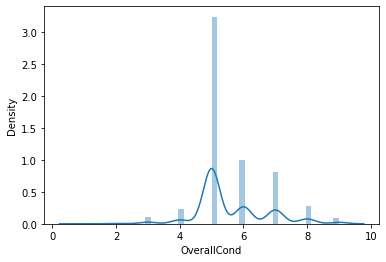

In [29]:
#OverallCond: Rates the overall condition of the house
sns.distplot(houses['OverallCond'])
plt.show()

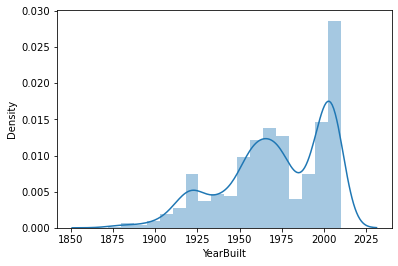

In [30]:
#YearBuilt: Original construction date
sns.distplot(houses['YearBuilt'])
plt.show()

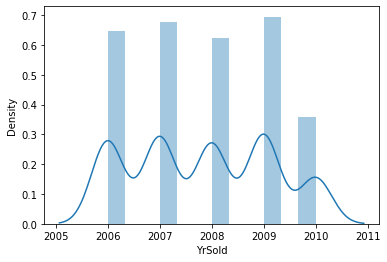

In [31]:
#YrSold: Year Sold (YYYY)
sns.distplot(houses['YrSold'])
plt.show()

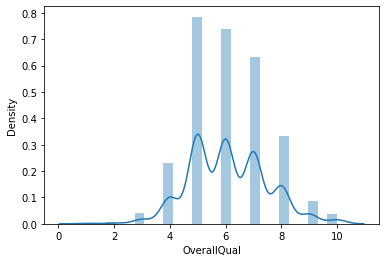

In [32]:
#OverallQual: Rates the overall material and finish of the house
sns.distplot(houses['OverallQual'])
plt.show()

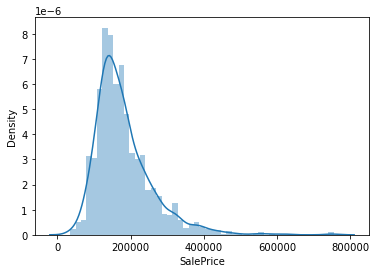

In [33]:
#SalePrice
sns.distplot(houses['SalePrice'])
plt.show()

### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [34]:
# all numeric (float and int) variables in the dataset
houses_numeric = houses.select_dtypes(include=['float64', 'int64'])
houses_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [35]:
#Here, we do not want 'Id'.
houses_numeric = houses_numeric.drop(['Id'], axis=1)
houses_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Plotting correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [36]:
# correlation matrix
houses_cor = houses_numeric.corr()
houses_cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


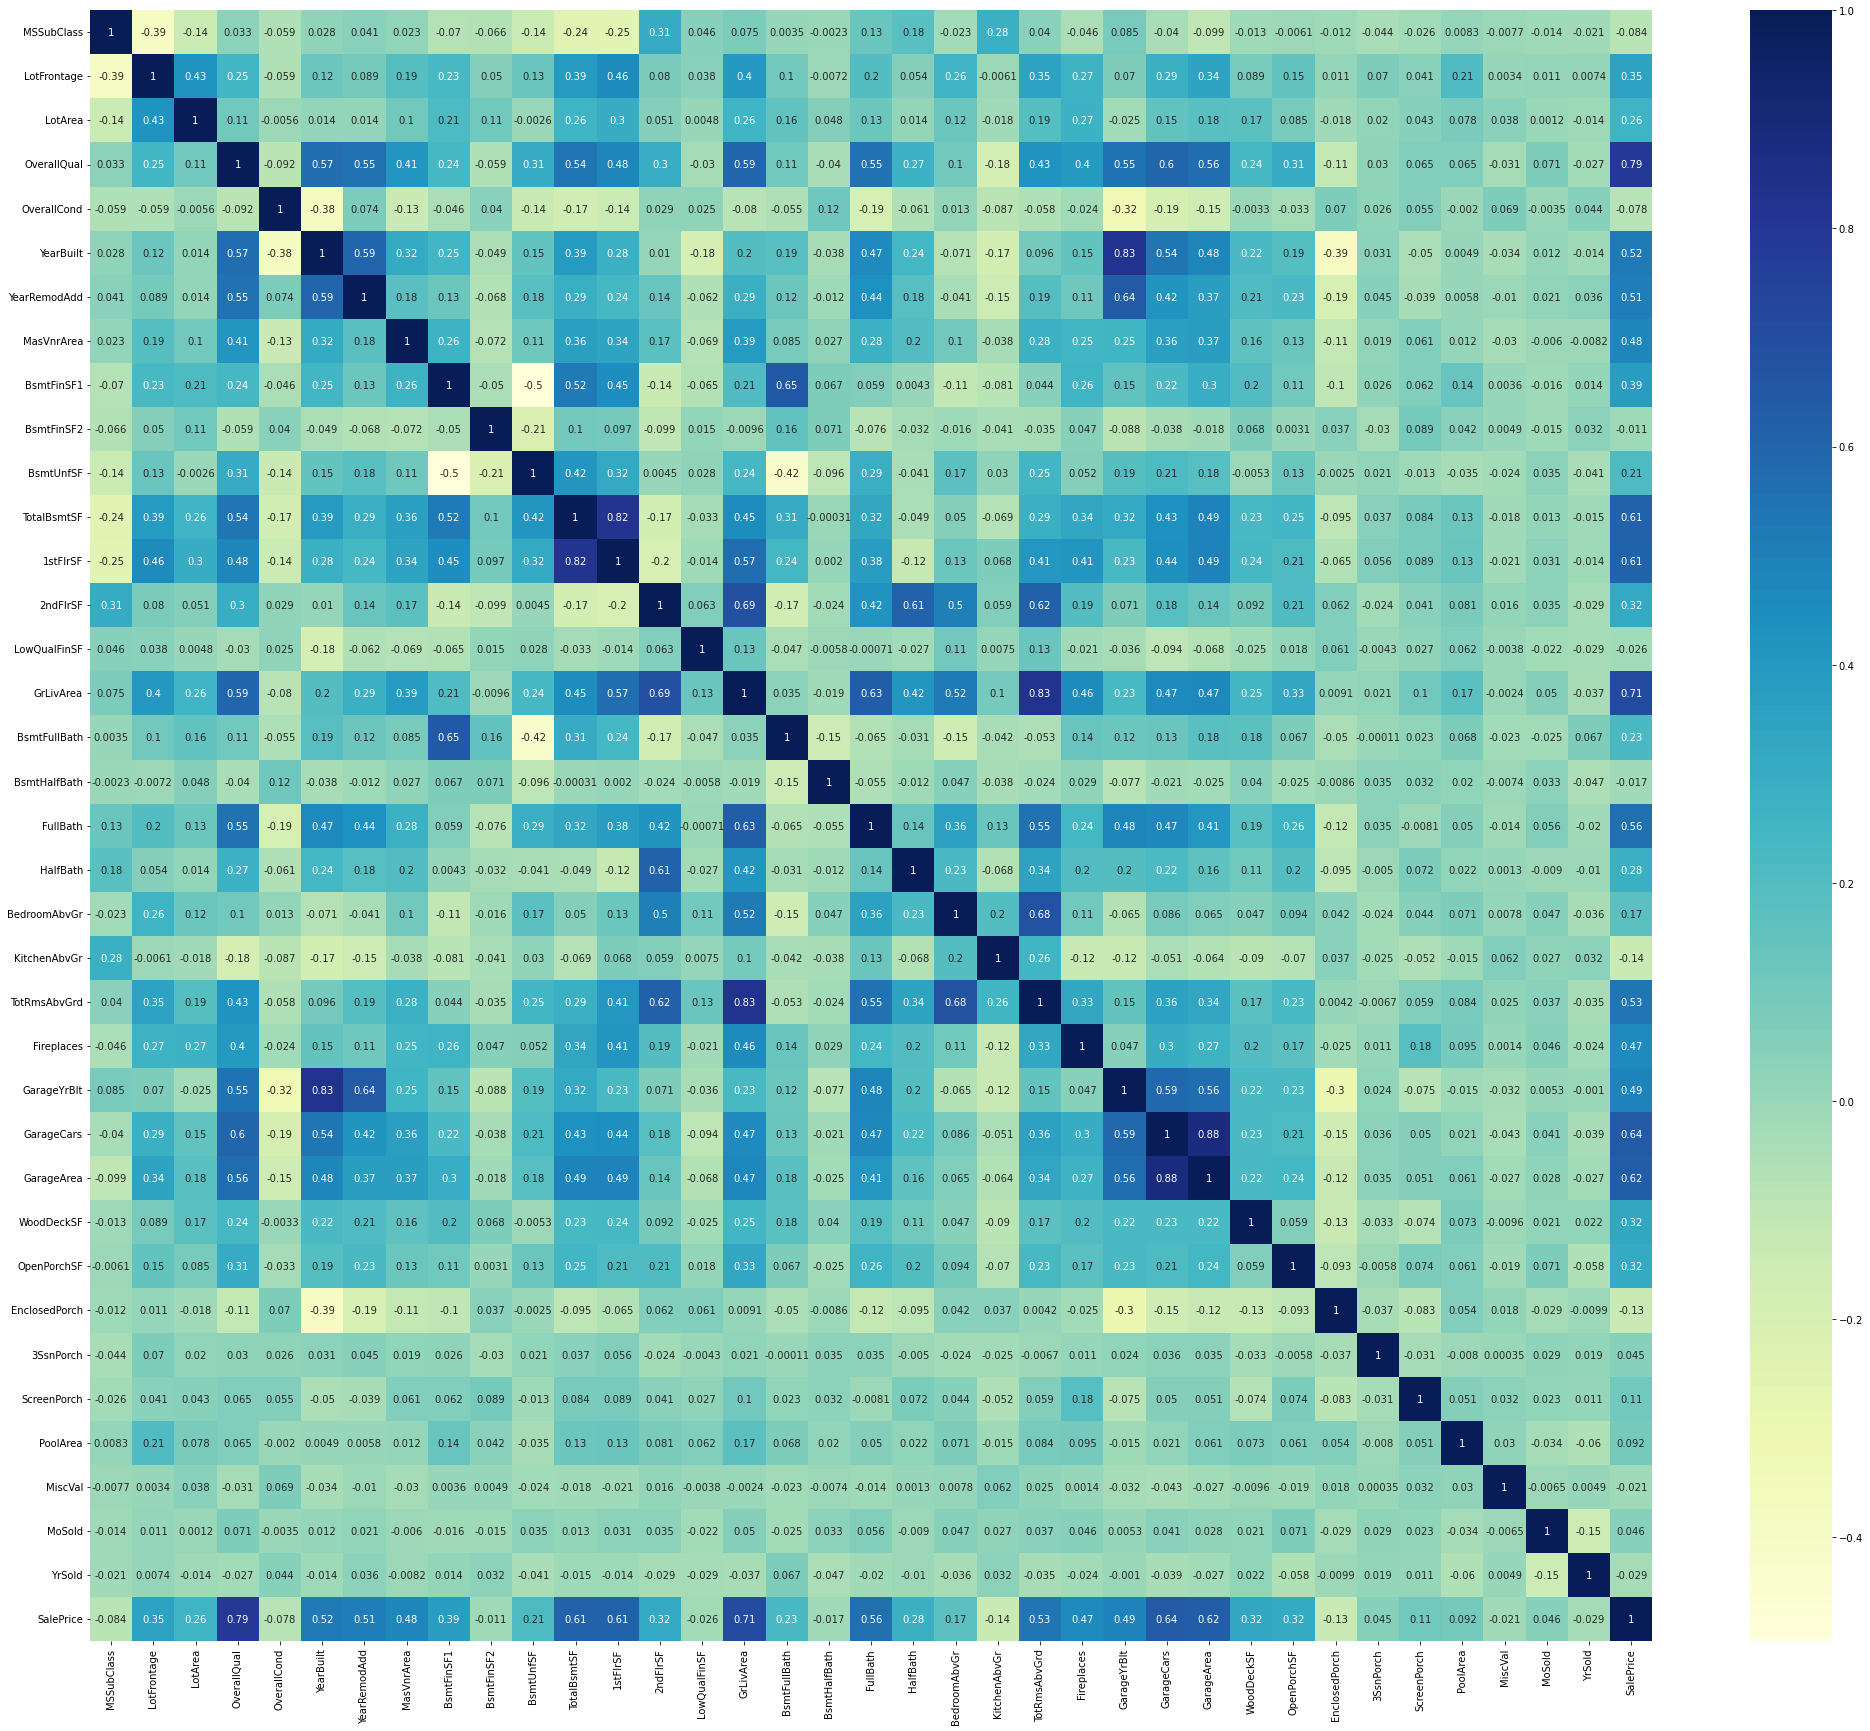

In [37]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(35,30))

# heatmap
sns.heatmap(houses_cor, cmap="YlGnBu", annot=True)
plt.show()


The heatmap shows some useful insights:

Correlation of price with independent variables:
- SalePrice is highly (positively) correlated with OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF

- SalePrice is negatively correlated to ```MSSubClass```, ```OverallCond```, ```BsmtFinSF2```, ```LowQualFinSF``` And ```BsmtHalfBath```

Correlation among independent variables:
- Many independent variables are highly correlated : TotRmsAbvGrd

Thus, while building the model, multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

There are no missing values in the dataset.

In [38]:
# variable formats
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [39]:
# Checking the outliers
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [40]:
#Dropping NA Columns from DataSet
houses.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'LotFrontage'], axis=1, inplace=True)

In [41]:
houses.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [42]:
houses2 = houses.dropna(axis=0)
houses2['GarageYrBlt'].isna().value_counts()

False    747
Name: GarageYrBlt, dtype: int64

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [43]:
# split into X and y

#X = houses2.loc[:, ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF']]  # predictors in variable X

X = houses2.loc[:, ['LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
  'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
  'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 
  'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 
  'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
  '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 
  'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 
  'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
  'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
  'SaleType', 'SaleCondition']]


y = houses2['SalePrice'] # response variable in Y

In [44]:
# creating dummy variables for categorical variables

# subset all categorical variables
houses_categorical = X.select_dtypes(include=['object'])
houses_categorical.head()

,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
1,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
6,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


In [45]:
# convert into dummies - one hot encoding
houses_dummies = pd.get_dummies(houses_categorical, drop_first=True)
houses_dummies.head()

,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
6,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [46]:
# drop categorical variables 
X = X.drop(list(houses_categorical.columns), axis=1)

In [47]:
# concat dummy variables with X
X = pd.concat([X, houses_dummies], axis=1)

In [48]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_WD', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=205)

In [49]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 3. Model Building and Evaluation

## Linear Regression

Let's now try predicting SalePrices, a dataset using linear regression.

In [50]:
# Instantiate
lm = LinearRegression()

In [51]:
# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [52]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-7763043896904720.0
[ 1.11661200e+04  7.79682260e+03 -5.11287409e+03  3.54545746e+03
  3.34135677e+03  2.82299074e+03 -6.49911780e+03  8.92559905e+03
 -1.29221914e+04 -1.24733015e+04  5.18803844e+04 -2.74029861e+03
  3.62803856e+03 -2.30360178e+03 -1.74432440e+03  6.30120141e+03
 -2.65472299e+03 -2.22675740e+01 -1.19903054e+04 -1.31645275e+03
  1.00290571e+04  3.13258406e+03  2.25696316e+02 -1.06329125e+03
  1.60515576e+02  1.81925392e+03  6.57310800e+03 -8.63468759e+02
 -2.74637995e+03 -2.77497000e+03  4.23999530e+03 -1.38982586e+03
 -7.59402212e+02  1.58393498e+03  8.65776609e+03  2.43251382e+03
  1.10086797e+04 -1.42276521e+17  1.86195236e+03 -3.45256876e+03
 -3.68599186e+03 -6.03312540e+03  4.34152204e+03 -5.56349591e+03
 -1.24533712e+03 -9.93658017e+02 -1.06374900e+04 -8.39106217e+03
 -6.91491801e+03 -6.66999324e+03 -1.34834962e+04 -5.51160410e+03
 -3.18706758e+03 -3.95952009e+03 -8.77204700e+03 -2.27597489e+04
 -1.74134877e+03 -1.59222055e+04  7.64998910e+02  1.26634475e+03
 -1.2

In [53]:
from sklearn.metrics import r2_score, mean_squared_error

In [54]:
# Predict using X_train & X_test
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

# Checking the R2 score of y_train & y_pred_train
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

0.9238948629500566


In [55]:
#Checking the R2 score of y_test & y_pred_test
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

-1.2792092164930281e+25


In [56]:
# Checking the RSS with y_train & y_pred_train
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

323269417080.0


In [57]:
# Checking the RSS with y_test & y_pred_test
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

1.6687886334099796e+37


In [58]:
# Checking MSE score with y_train & y_pread_train
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

619290071.0344827


In [59]:
# Checking MSE score with y_test & y_pread_test
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

7.41683837071102e+34


## Ridge and Lasso Regression

Let's now try predicting Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house. a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [60]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [89]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 0.1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.12982618e+04  8.09125873e+03 -4.11330178e+03  3.54529193e+03
  3.41447271e+03  2.30728554e+03 -6.77190128e+03  9.17666577e+03
 -7.57575497e+03 -6.39741644e+03  4.50406889e+04 -2.76881047e+03
  3.37265779e+03 -2.23203112e+03 -1.64773806e+03  6.25729875e+03
 -2.77658837e+03 -7.07588045e+01 -1.21888981e+04 -1.31235696e+03
  1.00118753e+04  3.20938637e+03  2.73215086e+02 -1.04884325e+03
  2.81946187e+02  1.95788942e+03  6.55528403e+03 -7.55433707e+02
 -2.72184677e+03 -2.81140608e+03  4.42161468e+03 -1.26872063e+03
 -5.98084503e+02  1.58952547e+03  8.56131117e+03  2.43060348e+03
  1.10196546e+04  0.00000000e+00  1.77120017e+03 -3.39324538e+03
 -3.67412061e+03 -5.98977815e+03  4.29291838e+03 -5.51191365e+03
 -1.16763954e+03 -1.03260274e+03 -1.04266693e+04 -8.47382082e+03
 -6.97760031e+03 -6.42708318e+03 -1.32589907e+04 -5.68391073e+03
 -3.12725511e+03 -3.96191924e+03 -8.65378618e+03 -2.23485880e+04
 -1.76477245e+03 -1.58657572e+04  6.31122109e+02  1.13957016e+03
 -1.22522636e+04 -8.12541

In [90]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

# Calculating R2 score on y_train, y_pred_train
metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

# Calculating R2 score on y_test, y_pred_test
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

# Calculating RSS score on y_train, y_pred_train
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

# Calculating RSS score on y_test, y_pred_test
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

# Calculating MSE score on y_train, y_pred_train
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

# Calculating MSE score on y_test, y_pred_test
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9239295755867037
0.4883612019222193
323121969295.93176
667456894177.5581
619007604.0151949
2966475085.2335916


## Lasso Regression

In [91]:
# Declaring lasso regression object
lasso = Lasso()

folds = 5

# cross validation for Lasso regression
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [92]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1000}


In [93]:
#Fitting Ridge model for alpha = 1000 and printing coefficients which have been penalised

alpha =1.0

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso()

In [94]:
# Printingthe coefficients for Lasso Regression
lasso.coef_

array([ 11390.43662807,   8012.61078971,  -3828.40321812,   3452.6192754 ,
         3458.96024659,   2389.09831483,  -6725.07066644,   8720.62602943,
        -1681.81362954,    -69.9506839 ,  37830.74811502,  -2800.55207268,
         3267.3056475 ,  -2261.8664869 ,  -1541.43726186,   6359.84936511,
        -2764.08430392,    -42.05765329, -12324.22571703,  -1357.9541188 ,
        10053.87399994,   3238.49509487,    321.88388686,  -1093.20539717,
          263.77216254,   1920.97015349,   6562.80392462,   -593.08683091,
        -2700.28598368,  -2811.25706296,   4362.99511774,  -1285.87769576,
         -611.66902544,   1585.40665613,   8633.55669408,   2538.41030338,
        11119.00798989,      0.        ,   1779.16704012,  -3381.35917466,
        -3669.07071502,  -5950.19646976,   4292.74325638,  -5589.93323891,
        -1179.15083861,  -1034.20018352, -10368.98749052,  -8596.59652743,
        -7069.28297866,  -6509.05188268, -13368.4172541 ,  -5806.49941814,
        -3103.18723192,  

In [95]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

# Calculating R2 score on y_train, y_pred_train
metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

# Calculating R2 score on y_test, y_pred_test
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

# Calculating RSS score on y_train, y_pred_train
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

# Calculating RSS score on y_test, y_pred_test
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

# Calculating MSE score on y_train, y_pred_train
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

# Calculating MSE score on y_test, y_pred_test
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.923896036474159
0.48393074438973016
323264432338.27026
673236634563.8046
619280521.7208242
2992162820.283576


In [96]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.238949e-01,9.239296e-01,4.839307e-01
1,R2 Score (Test),-1.279209e+25,4.883612e-01,3.232644e+11
2,RSS (Train),3.232694e+11,3.231220e+11,6.732366e+11
3,RSS (Test),1.668789e+37,6.674569e+11,2.488535e+04
4,MSE (Train),2.488554e+04,2.487986e+04,5.470067e+04
5,MSE (Test),2.723387e+17,5.446536e+04,NaN
6,NaN,NaN,9.238960e-01,NaN


## Checking the changes in the coefficients after regularization

In [97]:
# Declaring the betas 
betas = pd.DataFrame(index=X.columns)

In [98]:
# assigning the X.columns to beta.rows
betas.rows = X.columns

In [99]:
# Setting betas for linerear, Ridge & Lasso.
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [101]:
# Printing Betas for all Linear, Ridge & Lasso.
pd.set_option('display.max_rows', None)
betas.head(210)

,Linear,Ridge,Lasso
LotArea,1.116612e+04,1.129826e+04,11390.436628
OverallQual,7.796823e+03,8.091259e+03,8012.610790
YearBuilt,-5.112874e+03,-4.113302e+03,-3828.403218
YearRemodAdd,3.545457e+03,3.545292e+03,3452.619275
MasVnrArea,3.341357e+03,3.414473e+03,3458.960247
BsmtFinSF1,2.822991e+03,2.307286e+03,2389.098315
BsmtUnfSF,-6.499118e+03,-6.771901e+03,-6725.070666
TotalBsmtSF,8.925599e+03,9.176666e+03,8720.626029
1stFlrSF,-1.292219e+04,-7.575755e+03,-1681.813630
2ndFlrSF,-1.247330e+04,-6.397416e+03,-69.950684


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

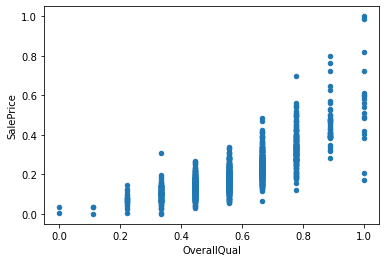

In [185]:
# Plotting a scatter plot to visualize the data
houses.plot.scatter(x = 'OverallQual', y = 'SalePrice')

In [180]:
# Scaling the data between 0 and 1
scaler = MinMaxScaler()
houses[['OverallQual', 'SalePrice']] = scaler.fit_transform(houses[['OverallQual', 'SalePrice']])

In [181]:
# Read in the data
X = houses['OverallQual'].values.reshape(-1,1)
y = houses['SalePrice']

In [182]:
reg = LinearRegression() 
reg.fit(X,y)

LinearRegression()

In [183]:
# Predictions on the basis of the model
y_pred = reg.predict(X)
y_pred

array([0.25960914, 0.19651262, 0.25960914, ..., 0.25960914, 0.1334161 ,
       0.1334161 ])

In [184]:
r2_score(y, y_pred) #  for 62.5% of the variation present in the SalesPrice

0.6256518924621179

In [186]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y - y_pred))
print(rss)
mse = mean_squared_error(y, y_pred)
print(mse)
# Root Mean Squared Error
rmse = mse**0.5
print(rmse)

6.647389837726324
0.0045530067381687155
0.06747597156150266


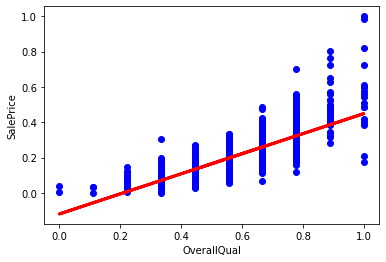

In [187]:
# Plot for Predicted SalesPrice vs OverallQual
plt.scatter( X , y , color = 'blue') # original data shown as blue points
plt.plot(X , y_pred , color = 'red' , linewidth = 3) # Fitted model in red
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

In [189]:
#help(PolynomialFeatures)
X = houses['OverallQual'].values.reshape(-1,1)
print(X)

[[0.66666667]
 [0.55555556]
 [0.66666667]
 ...
 [0.66666667]
 [0.44444444]
 [0.44444444]]


In [190]:
poly = PolynomialFeatures(3) # Want to generate features with degree less than or equal to
                             # the specified degree
Y = poly.fit_transform(X) # Transform the variable X to 1, X, X^2, X^3
print(Y)

[[1.         0.66666667 0.44444444 0.2962963 ]
 [1.         0.55555556 0.30864198 0.17146776]
 [1.         0.66666667 0.44444444 0.2962963 ]
 ...
 [1.         0.66666667 0.44444444 0.2962963 ]
 [1.         0.44444444 0.19753086 0.0877915 ]
 [1.         0.44444444 0.19753086 0.0877915 ]]


In [191]:
# Building the polynomial regression model with degree 5
degree=5 # got this number through trial and this is the lowest value which fit the data perfectly
polyreg5 = PolynomialFeatures(degree)
X_poly5 = polyreg5.fit_transform(X) # Transform the variable X to 1, X, X^2, X^3, X^4, X^5
linreg5 = LinearRegression()
linreg5.fit(X_poly5, y)

LinearRegression()

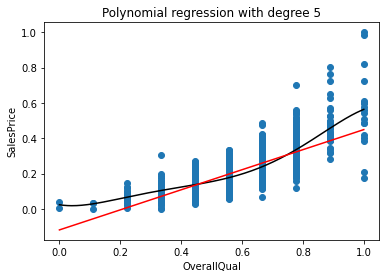

In [192]:
# Plotting the polynomial regression(degree-5) and simple linear regression
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1) # Between 0 and 1 we get 300 equally spaced values
# print(X_seq)
plt.figure()
plt.scatter(X,y) 
plt.plot(X_seq,linreg5.predict(polyreg5.fit_transform(X_seq)),color="black") # model fit with polynomial regression
plt.plot(X_seq,reg.predict(X_seq),color="red") # model fit with linear regression
plt.title("Polynomial regression with degree "+str(degree))
plt.xlabel("OverallQual")
plt.ylabel("SalesPrice")
plt.show()

In [193]:
y_pred5 = linreg5.predict(polyreg5.fit_transform(X)) # store predictions from the polynomial regression in the variable y_pred5
print(r2_score(y, y_pred5))

0.6839537783809773


In [194]:
# Metrics to assess model performance
rss = np.sum(np.square(y - y_pred5))
print(rss)
mse = mean_squared_error(y, y_pred5)
print(mse)
rmse = mse**0.5
# Root Mean Squared Error
print(rmse)

5.61210915599325
0.0038439103808172942
0.061999277260443075


## Ridge Regression

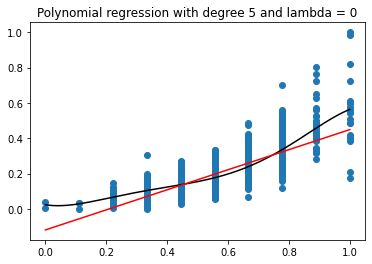

r2 score = 0.6839537783809773
[  0.          -0.28137462   4.07743835 -11.56938947  14.03641939
  -5.72324339]


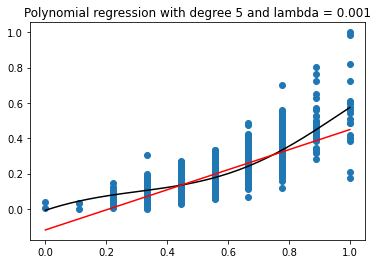

r2 score = 0.6829886403520788
[ 0.          0.57052985 -0.95331756  0.32018412  1.72302355 -1.07888143]


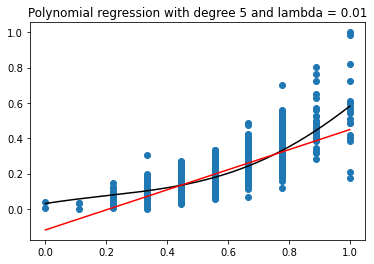

r2 score = 0.6821278996325115
[ 0.          0.27081269 -0.3528657   0.40584536  0.58648468 -0.35924937]


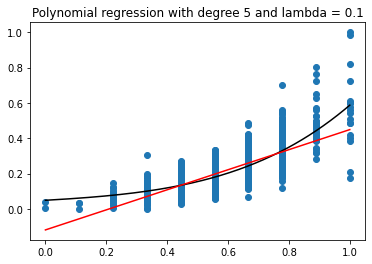

r2 score = 0.681219251496338
[ 0.          0.0975433   0.08860598  0.19673026  0.17230001 -0.01665918]


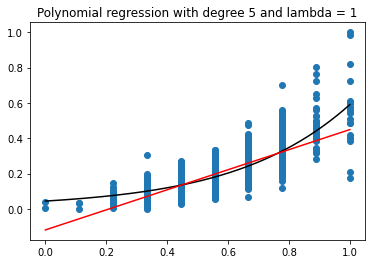

r2 score = 0.6809180479436319
[0.         0.10530117 0.13153525 0.13342599 0.10929865 0.06652383]


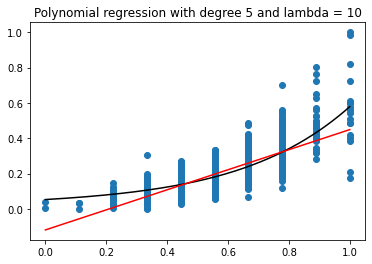

r2 score = 0.6791327684970636
[0.         0.10148477 0.12130519 0.11584775 0.10176648 0.08553543]


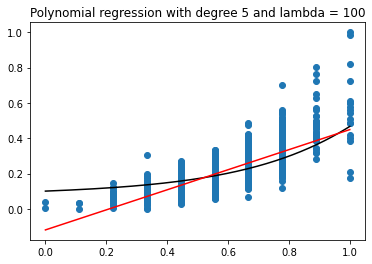

r2 score = 0.6026119909264416
[0.         0.06697214 0.08191715 0.07991945 0.07274448 0.06466959]


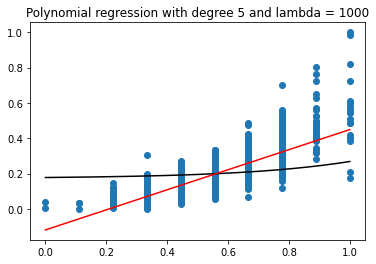

r2 score = 0.2043836808649313
[0.         0.01638497 0.02014538 0.01974552 0.01807688 0.01618896]


In [195]:
# Applying Ridge Regression with varying the hyperparameter 'lambda'

X_seq_houses = np.linspace(X.min(),X.max(),300).reshape(-1,1) # values to be considered for predictor variable
lambdas_houses = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000] # Higher the value of lambda, 
                                                  # more the regularization
for i in lambdas_houses: # for each lambda we get different model coefficients
    degree = 5 # Degree for polynomial regression - chose 5 since this is the lowest number that gave a perfect fit
    # Creating degree 5 features
    ridgecoef = PolynomialFeatures(degree)
    # Transforming input features to polynomial features (1, x1, x2, x3, x4, x5)    
    X_poly = ridgecoef.fit_transform(X)
    ridgereg = Ridge(alpha = i) # Initialize the Ridge Regression model with a specific lambda
    ridgereg.fit(X_poly, y) # fit the model on the polynomial features
    
    # Plotting the ridge regression model for each lambda
    plt.figure()
    plt.scatter(X,y)
    plt.plot(X_seq,ridgereg.predict(ridgecoef.fit_transform(X_seq_houses)),color="black") # Polynomial Regression
    plt.plot(X_seq,reg.predict(X_seq_houses),color="red") # Linear Regression
    plt.title("Polynomial regression with degree "+str(degree) + " and lambda = " + str(i))
    plt.show()
    
    #Computing the r2 score
    y_pred = ridgereg.predict(ridgecoef.fit_transform(X))
    print("r2 score = " + str(r2_score(y, y_pred))) 
    print(ridgereg.coef_) # model coefficients

### Lasso Regression

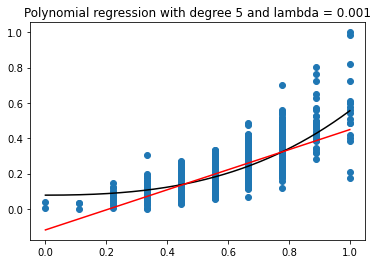

r2 score = 0.678352748267283
[0.         0.         0.15215691 0.32560934 0.         0.        ]


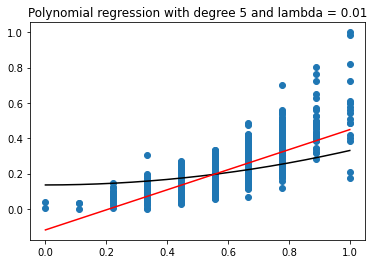

r2 score = 0.4248362222708051
[0.         0.         0.19508728 0.         0.         0.        ]


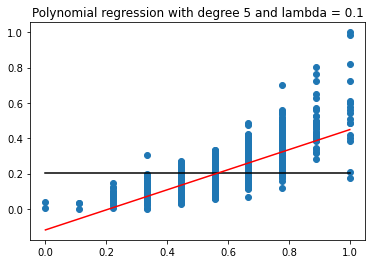

r2 score = 0.0
[0. 0. 0. 0. 0. 0.]


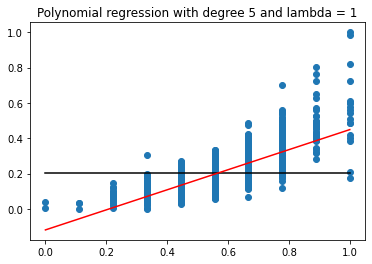

r2 score = 0.0
[0. 0. 0. 0. 0. 0.]


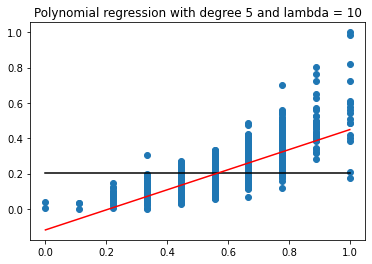

r2 score = 0.0
[0. 0. 0. 0. 0. 0.]


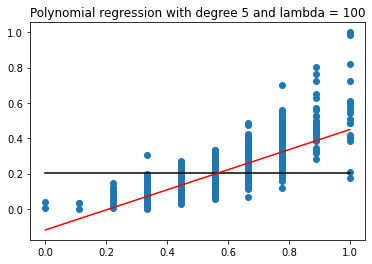

r2 score = 0.0
[0. 0. 0. 0. 0. 0.]


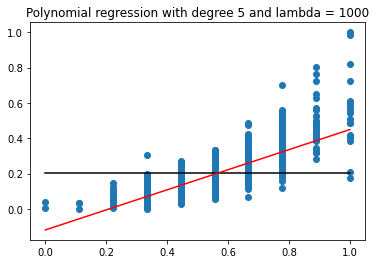

r2 score = 0.0
[0. 0. 0. 0. 0. 0.]


In [196]:
# Applying Lasso Regression with varying the hyperparameter 'lambda'

lambdas_houses = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in lambdas_houses:
    degree = 5
    # Creating degree 5 features
    lassocoef = PolynomialFeatures(degree)
    # Transforming input features to polynomial features (1, x1, x2, x3, x4, x5)
    X_poly = lassocoef.fit_transform(X)
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(X_poly, y)
    # Plotting the ridge model
    plt.figure()
    plt.scatter(X,y)
    plt.plot(X_seq,lassoreg.predict(lassocoef.fit_transform(X_seq)),color="black")
    plt.plot(X_seq,reg.predict(X_seq),color="red")
    plt.title("Polynomial regression with degree "+str(degree) + " and lambda = " + str(i))
    plt.show()
    # Compute R^2 
    y_pred = lassoreg.predict(lassocoef.fit_transform(X))
    print("r2 score = " + str(r2_score(y, y_pred)))
    print(lassoreg.coef_)

## Ridge and Lasso Regression for specific lambda value¶

In [197]:
# Ridge Regression

ridgecoef_houses = PolynomialFeatures(degree, include_bias = True) # Creating degree 5 features
# Transforming input features to polynomial features (1, x1, x2, x3, x4, x5)    
X_poly = ridgecoef.fit_transform(X)
ridgereg = Ridge(alpha = 0.001) # Initialize the Ridge Regression model with a specific lambda
ridgereg.fit(X_poly, y) # fit the model on the polynomial features
print(ridgereg.coef_)    
y_pred = ridgereg.predict(ridgecoef_houses.fit_transform(X))
print("r2 score = " + str(r2_score(y, y_pred)))

# Lasso Regression
lassocoef = PolynomialFeatures(degree) # Creating degree 5 features
# Transforming input features to polynomial features (1, x1, x2, x3, x4, x5)
X_poly = lassocoef.fit_transform(X)
lassoreg = Lasso(alpha = 0.001)
lassoreg.fit(X_poly, y)
print(lassoreg.coef_)
y_pred = lassoreg.predict(lassocoef.fit_transform(X))
print("r2 score = " + str(r2_score(y, y_pred)))

[ 0.          0.57052985 -0.95331756  0.32018412  1.72302355 -1.07888143]
r2 score = 0.6829886403520788
[0.         0.         0.15215691 0.32560934 0.         0.        ]
r2 score = 0.678352748267283


In [198]:
betas = pd.DataFrame(index=['1', 'x', 'x2', 'x3', 'x4', 'x5'], 
                     columns = ['Polynomial', 'Ridge', 'Lasso'])
betas['Polynomial'] = linreg5.coef_ # Polynomial Regression
betas['Ridge'] = ridgereg.coef_ # Ridge Regression
betas['Lasso'] = lassoreg.coef_ # Lasso Regression
betas

,Polynomial,Ridge,Lasso
1,0.000000,0.000000,0.000000
x,-0.281375,0.570530,0.000000
x2,4.077438,-0.953318,0.152157
x3,-11.569389,0.320184,0.325609
x4,14.036419,1.723024,0.000000
x5,-5.723243,-1.078881,0.000000
